## **Summary:**

Write a program in Python to run prediction with the *Prophet algorithm* (developed by FB team)

There are two files with test data attached: **past.csv** and **future.csv**
- **past.csv** - contains revenue per day with ad spend per day
- **future.csv** - contains ad spends, but doesn't contain revenue
 
## **Tasks:**
- working source code in Python
- result dataset in csv format - it should contain **date, actual** and **fitted values** for past and future
- plot of historical vs. fitted revenue + predicted future revenue
- plot of prophet trends decomposition (see attached example)

## **Results**:
- For the revenue predicting Prophet model was used with the **tuned hyperparameters**
- As a result of hyperparameters tunning **root mean square error (rmse) dropped** from more then $700 to $30
- From the forecast could be found that trend has a negative impact throughout time which indicated a need for future modification of the marketing strategy 

## **Getting started**

In [161]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit

In [300]:
# Adding datasets to a working space 
past = pd.read_csv('ven/past.csv', 
                   parse_dates=['date'], 
                   usecols=['date', 'revenue', 'facebook', 'google', 'bing', 'other']).rename(columns={'date':'ds', 'revenue':'y'})

future = pd.read_csv('ven/future.csv', 
                     parse_dates=['date'],
                     usecols=['date', 'facebook', 'google', 'bing', 'other']).rename(columns={'date':'ds'})


## **First model development**

In [301]:
# First model creation and regressors adding
model = Prophet()
model.add_country_holidays(country_name='US') # adding country holidays to a model
model.add_regressor('facebook')
model.add_regressor('google')
model.add_regressor('bing')
model.add_regressor('other')
model.fit(past)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [218]:
# Conducting cross-validation of a first model (untuned)
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(model, initial='700 days', period='10 days', horizon = '30 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,396933.760453,630.026793,625.751505,0.133293,0.129435,0.124774,0.000000
1,4 days,261706.460166,511.572537,498.229264,0.100885,0.109103,0.097089,0.333333
2,5 days,308416.766676,555.352831,533.355339,0.101268,0.109103,0.103135,0.333333
3,6 days,213252.268187,461.792451,385.433890,0.071765,0.064117,0.075443,0.666667
4,7 days,590803.075374,768.637155,644.766860,0.115250,0.130582,0.125210,0.333333


As could be seen from the table above untuned model performs poorly which assumes that the hyperparameters tuning process should be conducted

## **Hyperparameters tuning**

In [198]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params, daily_seasonality=True)
    m.add_country_holidays(country_name='US')
    m.add_regressor('facebook')
    m.add_regressor('google')
    m.add_regressor('bing')
    m.add_regressor('other')
    m.fit(past)  # Fit model with given params
    
    df_cv = cross_validation(m, initial='700 days', period='10 days', horizon = '30 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00


INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-01 00:00:00 and 2021-12-01 00:00:00



    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                  0.01   
1                     0.001                     0.01                  0.10   
2                     0.001                     0.01                  1.00   
3                     0.001                     0.01                 10.00   
4                     0.001                     0.10                  0.01   
..                      ...                      ...                   ...   
59                    0.500                     1.00                 10.00   
60                    0.500                    10.00                  0.01   
61                    0.500                    10.00                  0.10   
62                    0.500                    10.00                  1.00   
63                    0.500                    10.00                 10.00   

   seasonality_mode        rmse  
0          additive  509.682

In [216]:
# Extracting the best parameters (result with the minimum rmse value)
best_params = all_params[np.argmin(rmses)]
print(best_params)
print(np.argmin(rmses))

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}
30


## **Model development with tuned hyperparameters**

In [ ]:
# Building a model with tuned hyperparameters
m = Prophet(changepoint_prior_scale=0.01, 
            seasonality_prior_scale=10.0,
            holidays_prior_scale=1.0, 
            seasonality_mode='additive')

m.add_country_holidays(country_name='US')

m.add_regressor('facebook')
m.add_regressor('google')
m.add_regressor('bing')
m.add_regressor('other')

m.fit(past)

In [302]:
# Combining two datasets in one to use it for predictions
for_prediction = pd.concat([past.drop('y', axis=1), future]).reset_index().drop('index', axis=1)

# Predicting future data
forecast = m.predict(for_prediction)

## **Visualization**

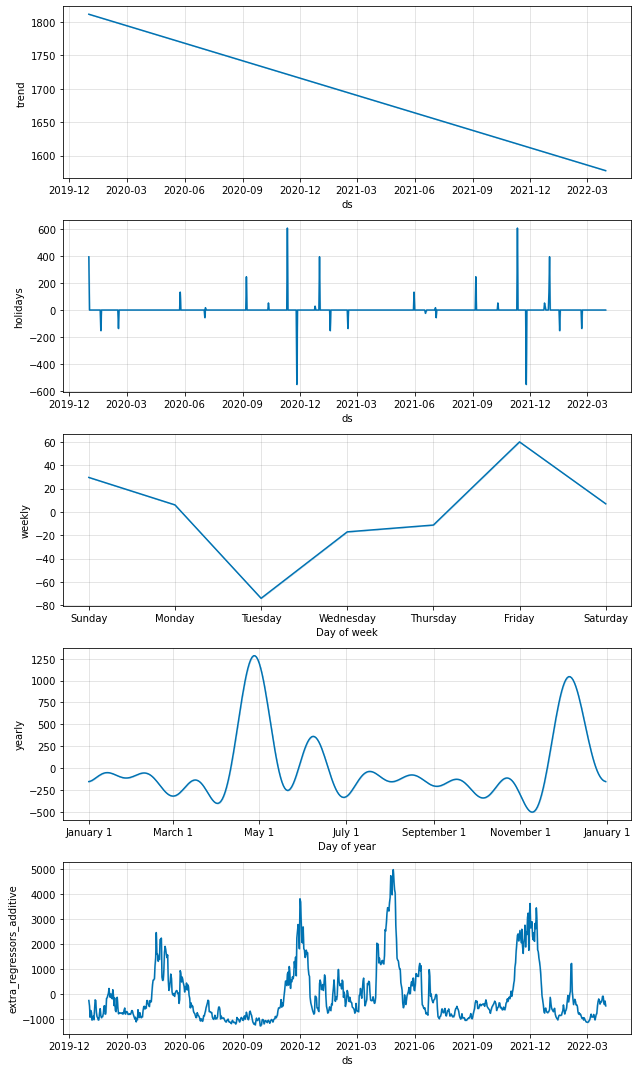

In [310]:
# Visualization of a forecast components
fig = m.plot_components(forecast)

# Saving graph
fig.savefig('ven/forecast_components.png')

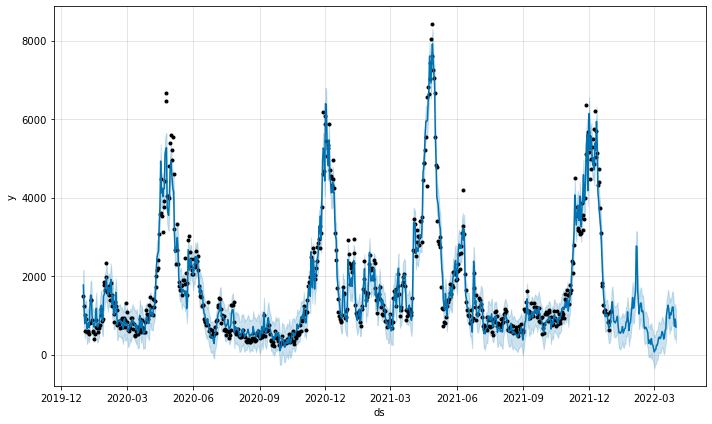

In [311]:
# Displaying forecast on a graph with the original (training/past) data
fig = m.plot(forecast)

# Saving graph
fig.savefig('ven/forecast_plot.png')

## **DataFrame combination and saving**

In [314]:
# Extracting fitted and predicted values from a forecast
for_prediction['predicted_revenue'] = forecast['yhat'].round(decimals=2)

# Adding fitted revenue and projected revenue columns to past and future datasets respectively
past['fitted_revenue'] = for_prediction.loc[past.index.to_list(), 'predicted_revenue']
future['predicted_revenue'] = for_prediction.loc[future.index.to_list(), 'predicted_revenue']

# Renaming dataframes columns to the initial names
past.rename(columns={'ds':'date', 'y':'revenue'}, inplace=True)
future.rename(columns={'ds':'date'}, inplace=True)

In [316]:
# Saving dataframes
past[['date', 'revenue', 'fitted_revenue']].to_csv('ven/past_with_fitted_revenue.csv', index=False)
future[['date', 'predicted_revenue']].to_csv('ven/future_with_predicted_revenue.csv', index=False)